The objective of this project is to predict survivors using Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
# Import Data
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Data information
print('The train data contains {} rows and {} columns'.format(train.shape[0], train.shape[1]))
print('The test data contains {} rows and {} columns'.format(test.shape[0], test.shape[1]))

The train data contains 891 rows and 12 columns
The test data contains 418 rows and 11 columns


In [5]:
# Get features informations
train.info()
print('\n')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null flo

Only two continious variables (age and Fare)

But there is some missing values that we have to treat

## Missing values

In [6]:
def percentage(x):
    return '{0:.2f}%'.format(x*100)

missing_train = train.isnull().sum().sort_values(ascending=False)
missing_test = test.isnull().sum().sort_values(ascending=False)
per_miss_train = missing_train/len(train)
per_miss_test = missing_test/len(test)
missing = pd.concat([missing_train, per_miss_train.apply(percentage), missing_test, per_miss_test.apply(percentage)], axis=1, 
                    keys=['Train', 'Percentage', 'Test', 'Percentage'])

missing.head() 

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,Train,Percentage,Test,Percentage
Age,177,19.87%,86.0,20.57%
Cabin,687,77.10%,327.0,78.23%
Embarked,2,0.22%,0.0,0.00%
Fare,0,0.00%,1.0,0.24%
Name,0,0.00%,0.0,0.00%


Text(0.5, 0, 'Count')

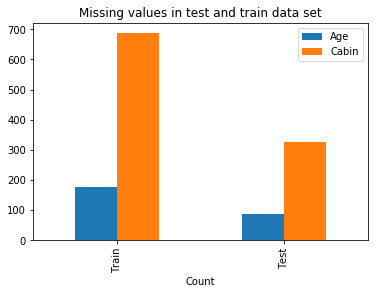

In [7]:
missing_count = pd.concat([missing[['Train', 'Test']].loc["Age"],missing[['Train', 'Test']].loc["Cabin"]],axis=1)
ax = missing_count.plot(kind='bar',title="Missing values in test and train data set",legend=True)
ax.set_xlabel("Count")

In [8]:
# From the training data we want to know the propotion of people survived compared to all people onboard 

survived = train.loc[train["Survived"] == 1]
not_survived = train.loc[train["Survived"] == 0]
survival_ratio_in_train = len(survived)/(len(not_survived)+len(survived))

# this ratio could be useful if we have to split out train data in futher steps
survival_ratio_in_train

0.3838383838383838

## Features analysis

To better understand the Data

In [9]:
# Compute the ratio of survivors 
survivors_ratio = len(train[train['Survived'] == 1] ) / len(train['Survived'])
survivors_ratio = percentage(survivors_ratio)
survivors_ratio

'38.38%'

No handles with labels found to put in legend.
No handles with labels found to put in legend.


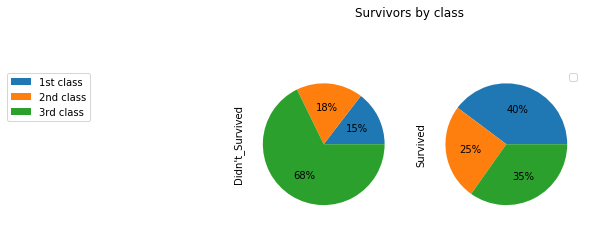

In [10]:
# survivors by Class
survivors_by_class = pd.crosstab(train["Pclass"],train["Survived"])
survivors_by_class.columns = ["Didn't_Survived", "Survived"]
ax1, ax2 = survivors_by_class.plot(kind='pie', title='Survivors by class', subplots=True, labels=None, autopct='%1.0f%%')
ax1.legend(['1st class', '2nd class', '3rd class'], loc='best', bbox_to_anchor=(-1, 1))

No handles with labels found to put in legend.
No handles with labels found to put in legend.


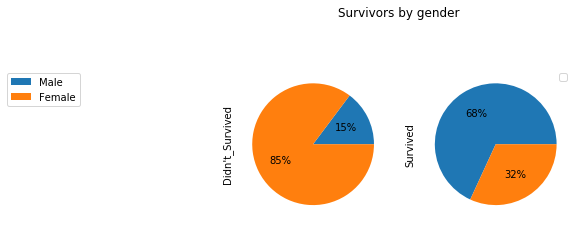

In [11]:
# survivors by Gender
survivors_by_gender = pd.crosstab(train['Sex'], train['Survived'])
survivors_by_gender.columns = ["Didn't_Survived", "Survived"]
ax1, ax2 = survivors_by_gender.plot(kind='Pie', title='Survivors by gender', subplots=True, labels=None, autopct='%1.0f%%')
ax1.legend(['Male', 'Female'], loc='best', bbox_to_anchor=(-1, 1))

No handles with labels found to put in legend.
No handles with labels found to put in legend.


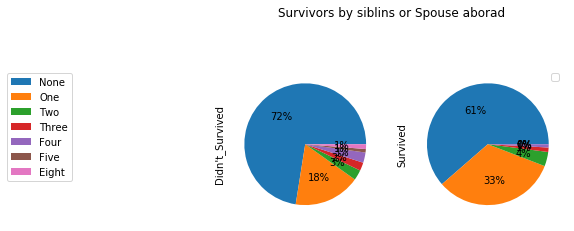

In [12]:
# survivors by siblins or Spouse aborad
survivors_by_sibsp = pd.crosstab(train['SibSp'],train['Survived'])
survivors_by_sibsp.columns = ["Didn't_Survived", "Survived"]
ax1, ax2 = survivors_by_sibsp.plot(kind='Pie', title='Survivors by siblins or Spouse aborad', subplots=True, 
                                   labels=None, autopct='%1.0f%%')
ax1.legend(['None', 'One', 'Two', 'Three', 'Four', 'Five', 'Eight'], loc='best', bbox_to_anchor=(-1, 1))

No handles with labels found to put in legend.
No handles with labels found to put in legend.


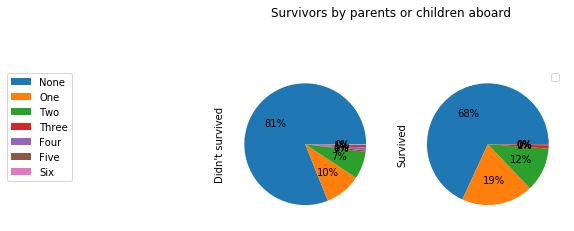

In [13]:
# survivors by parents or children aboard
survivors_by_parch = pd.crosstab(train['Parch'], train['Survived'])
survivors_by_parch.columns = ["Didn't survived", "Survived"]
ax1, ax2 = survivors_by_parch.plot(kind='Pie', title='Survivors by parents or children aboard', subplots=True, labels=None,
                                  autopct='%1.0f%%')
ax1.legend(['None', 'One', 'Two', 'Three', 'Four', 'Five', 'Six'], loc='best', bbox_to_anchor=(-1, 1))

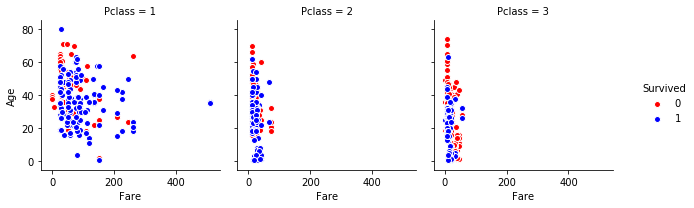

In [14]:
# survivors by Class, Fare ans Age
survivors_by_CFA = sns.FacetGrid(train, hue="Survived", col="Pclass", margin_titles=True, palette={1:"blue", 0:"red"})
survivors_by_CFA.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()

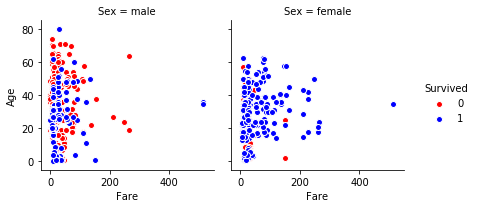

In [15]:
# survivors by Age and Fare
survivors_by_AF = sns.FacetGrid(train, hue='Survived', col='Sex', margin_titles=True, palette={1:"blue", 0:"red"})
survivors_by_AF.map(plt.scatter, 'Fare', 'Age', edgecolor='w').add_legend()

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


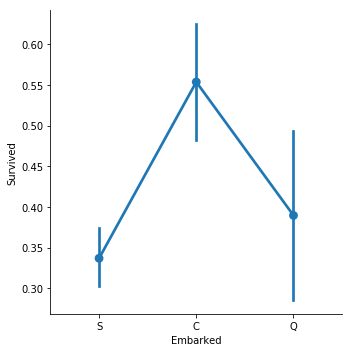

In [16]:
# survivors by boarding area
sns.factorplot(x ='Embarked', y="Survived", data=train)

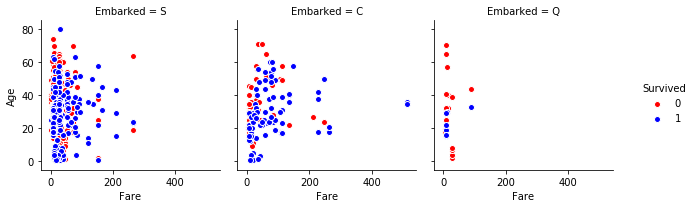

In [17]:
# survivord by Fare and Age based on Embarked
survivors_by_FAE = sns.FacetGrid(train, hue='Survived', col='Embarked', margin_titles=True, palette={1:"blue", 0:"red"})
survivors_by_FAE.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()

### Pearson correlation

Text(0.5, 1.0, 'Pearson Correlation')

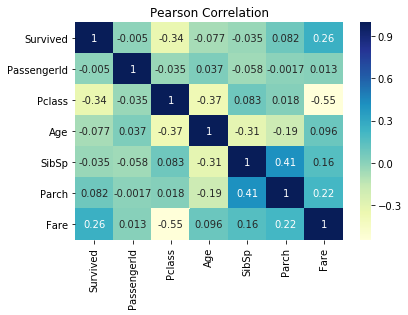

In [18]:
# let's make Survival as the 1st column
cols = train.columns.tolist()
cols[0], cols[1] = cols[1], cols[0]
re_train = train[cols]

# Pearson Correlation
colormap = plt.cm.viridis
corr = re_train.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.title('Pearson Correlation')

## Missing Values Imputation

In [19]:
# Fare in test Data
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [20]:
med_f = test[test['Embarked'] == 'S'][test['Pclass'] == 3]['Fare'].median()
test['Fare'] = test['Fare'].fillna(med_f)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [21]:
# Embarked in train Data 
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [22]:
# Compute the median of Fare for the boarding areas 

# Median of Cherbourg
med_c1 = train[train['Embarked'] == 'C'][train['Pclass'] == 1]['Fare'].median()
# Median of Southampton
med_s1 = train[train['Embarked'] == 'S'][train['Pclass'] == 1]['Fare'].median()
# Median of Queenstone
med_q1 = train[train['Embarked'] == 'Q'][train['Pclass'] == 1]['Fare'].median()
print('The median fare for class 1 ticket to embark from Cherbourg is {} \nThe median fare for class 1 ticket to embark from Southampton is {} \nThe median fare for class 1 ticket to embark from Queenston is {}'.format(med_c1, med_s1, med_q1))

The median fare for class 1 ticket to embark from Cherbourg is 78.2667 
The median fare for class 1 ticket to embark from Southampton is 52.0 
The median fare for class 1 ticket to embark from Queenston is 90.0


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


The cost of Cher's ticket is the closest to 80, so :

In [23]:
train["Embarked"] = train["Embarked"].fillna('C')

For Ages's missing values, we will fill them using <a href="https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm">Expectation maximization</a>


In [24]:
from sklearn import mixture

null_values = train['Age'].dropna().astype(int)
x = train['Age'].dropna()
x = x.values.reshape(-1, 1)

y1 = train['Age'].isnull().sum()
y2 = test['Age'].isnull().sum()

xpdf1 = np.linspace(0, 80,y1)
xpdf1 = xpdf1.reshape(-1, 1)
xpdf2 = np.linspace(0, 80,y2)
xpdf2 = xpdf1.reshape(-1, 1)

clf = mixture.GaussianMixture(n_components=2).fit(x)
density1 = np.exp(clf.score_samples(xpdf1))

X1, Y1 = clf.sample(y1)
X2, Y2 = clf.sample(y2)

train['Age'][np.isnan(train['Age'])] = np.absolute(X1)
test['Age'][np.isnan(test['Age'])] = np.absolute(X2)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.01480838, 0.01085948, 0.00691058, 0.01085948, 0.0078978 ,
        0.00296168, 0.00592335, 0.00888503, 0.0039489 , 0.00493613,
        0.00592335, 0.00888503, 0.01085948, 0.02369341, 0.01579561,
        0.03257844, 0.02961677, 0.02270619, 0.05824631, 0.02171896,
        0.03356567, 0.03060399, 0.02369341, 0.02270619, 0.03159122,
        0.02073174, 0.04837405, 0.02171896, 0.02171896, 0.02171896,
        0.01974451, 0.02566787, 0.00888503, 0.02961677, 0.01579561,
        0.01184671, 0.01579561, 0.00691058, 0.00888503, 0.01777006,
        0.01480838, 0.00987226, 0.00888503, 0.01184671, 0.00888503,
        0.00987226, 0.00197445, 0.01085948, 0.01184671, 0.00296168,
        0.0078978 , 0.00197445, 0.00493613, 0.0039489 , 0.0039489 ,
        0.0039489 , 0.0039489 , 0.00197445, 0.        , 0.00098723,
        0.        , 0.00296168, 0.00296168, 0.        , 0.00098723,
        0.        , 0.        , 0.00098723, 0.        , 0.00098723]),
 array([ 0.42      ,  1.55685714,  2.69371429,

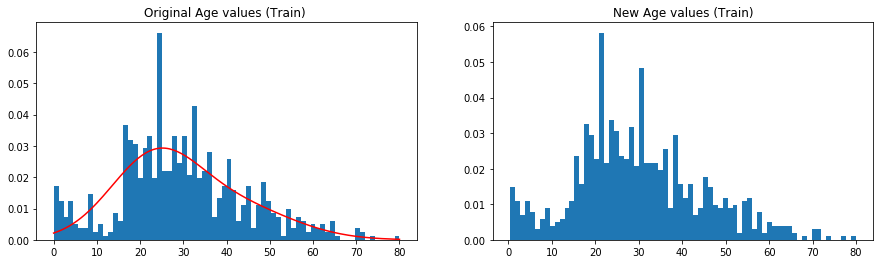

In [25]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values (Train) ')
axis2.set_title('New Age values (Train)')

axis1.hist(null_values,70,normed=True)
axis1.plot(xpdf1,density1,'-r')

axis2.hist(train['Age'],70,normed=True)

in the figure above we can see that the density fucntion gives a good approximation for the data. We use the Gaussian Mixture to fill the missing values

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


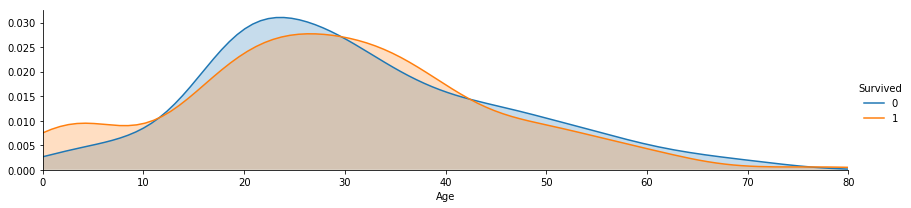

In [26]:
# Age Distribution

facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

In [27]:
train.corr()["Age"]

PassengerId    0.138987
Survived      -0.065218
Pclass        -0.298408
Age            1.000000
SibSp         -0.222006
Parch         -0.159858
Fare           0.079741
Name: Age, dtype: float64

In [28]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [29]:
# Creating Deck feature
train['Deck'] = train['Cabin'].str[0]
test['Deck'] = test['Cabin'].str[0]
train['Deck'].unique()
# Nan for null values

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


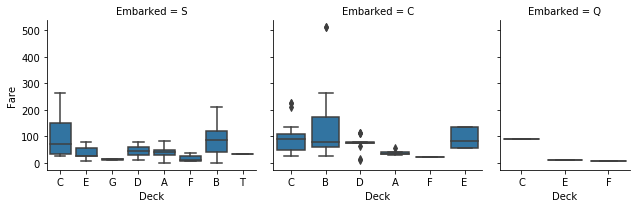

In [30]:
# Deck distribution with Fare and Embarked
g = sns.FacetGrid(train, col="Embarked", sharex=False, gridspec_kws={"width_ratios": [8, 8, 5]})
g.map(sns.boxplot, "Deck", "Fare")

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


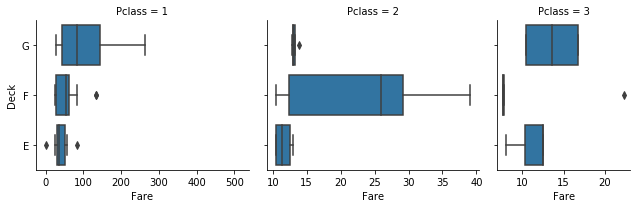

In [31]:
# Which class were in which Decks
g = sns.FacetGrid(train, col='Pclass', sharex=False, gridspec_kws={"width_ratios": [8, 8, 5]})
g.map(sns.boxplot, 'Fare', 'Deck')

In [32]:
FirstClassPrice = train[(train['Pclass'] == 1)]['Fare'].mean()
SecondClassPrice = train[(train["Pclass"] == 2)]['Fare'].mean()
ThridClassPrice = train[(train["Pclass"] == 3)]['Fare'].mean()

print("First class price: £%s" % FirstClassPrice) 
print("Second class price: £%s" % SecondClassPrice)
print("Thrid class price: £%s" % ThridClassPrice)

First class price: £84.15468749999992
Second class price: £20.66218315217391
Thrid class price: £13.675550101832997


In [33]:
# 1st class decks
first_class_decks = train.loc[(train['Pclass'] == 1), 'Deck'].unique()
first_class_decks

array(['C', 'E', 'A', nan, 'B', 'D', 'T'], dtype=object)

In [34]:
# 2nd class decks
second_class_decks =  train.loc[(train["Pclass"] == 2), 'Deck'].unique()
second_class_decks

array([nan, 'D', 'F', 'E'], dtype=object)

In [35]:
# 3rd class decks
third_class_decks =  train.loc[(train["Pclass"] == 3), 'Deck'].unique()
third_class_decks

array([nan, 'G', 'F', 'E'], dtype=object)

In [36]:
train.loc[(train['Deck'].isnull()) & (train['Pclass'] == 1), 'Deck'] = 'A'
train.loc[(train['Deck'].isnull()) & (train['Pclass'] == 2), 'Deck'] = 'D'
train.loc[(train['Deck'].isnull()) & (train['Pclass'] == 3), 'Deck'] = 'G'

test.loc[(test['Deck'].isnull()) & (test['Pclass'] == 1), 'Deck'] = 'A'
test.loc[(test['Deck'].isnull()) & (test['Pclass'] == 2), 'Deck'] = 'D'
test.loc[(test['Deck'].isnull()) & (test['Pclass'] == 3), 'Deck'] = 'G'

Now that we have the feature "Deck" we don't need "Cabin", so let's drop it

In [37]:
train.drop(['Cabin'], axis = 1, inplace = True)
test.drop(['Cabin'], axis = 1, inplace = True)

In [38]:
# Let's see if there are still missing values

missing_train = train.isnull().sum().sort_values(ascending=False)
missing_test = test.isnull().sum().sort_values(ascending=False)
per_miss_train = missing_train/len(train)
per_miss_test = missing_test/len(test)
missing = pd.concat([missing_train, per_miss_train.apply(percentage), missing_test, per_miss_test.apply(percentage)], axis=1, 
                    keys=['Train', 'Percentage', 'Test', 'Percentage'])

missing.head() 

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Train,Percentage,Test,Percentage
Age,0,0.00%,0.0,0.00%
Deck,0,0.00%,0.0,0.00%
Embarked,0,0.00%,0.0,0.00%
Fare,0,0.00%,0.0,0.00%
Name,0,0.00%,0.0,0.00%


Now that we treated missing values, let's do some :

# Feature Engineering

## Creating some features

In [39]:
# Family If there is parents, siblings or spouse onboard 
train['Family'] = train['Parch'] + train['SibSp']
train['Family'].loc[train['Family'] > 1] = 1
train['Family'].loc[train['Family'] == 0] = 0

test['Family'] = test['Parch'] + test['SibSp']
test['Family'].loc[test['Family'] > 1] = 1
test['Family'].loc[test['Family'] == 0] = 0

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


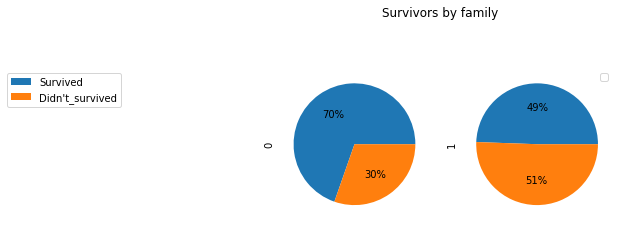

In [40]:
# survivors by Family
survivors_by_family = pd.crosstab(train['Survived'], train['Family'])
ax1, ax2 = survivors_by_family.plot(kind='Pie', title='Survivors by family', subplots=True, labels=None, autopct='%1.0f%%')
ax1.legend(['Survived', "Didn't_survived"], loc='best', bbox_to_anchor=(-1, 1))

In [41]:
# Having a family could wither be in SibSp or Parch
train.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
test.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Deck,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,G,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,G,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,G,0


In [43]:
# Create a Title feature

train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Titles
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [44]:
def replaceRateTitle(df):
    rare_title = ['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']
    df.loc[df["Title"] == "Mlle", "Title"] = 'Miss'
    df.loc[df["Title"] == "Ms", "Title"] = 'Miss'
    df.loc[df["Title"] == "Mme", "Title"] = 'Mrs'
    df.loc[df["Title"] == "Dona", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Lady", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Countess", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Capt", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Col", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Don", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Major", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Rev", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Sir", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Jonkheer", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Dr", "Title"] = 'Rare Title'
    
    return df    

In [45]:
train = replaceRateTitle(train)
train["Title"].value_counts()

Mr            517
Miss          185
Mrs           126
Master         40
Rare Title     23
Name: Title, dtype: int64

In [46]:
test = replaceRateTitle(test)
test['Title'].value_counts()

Mr            240
Miss           79
Mrs            72
Master         21
Rare Title      6
Name: Title, dtype: int64

Text(0.5, 0.98, 'Survival by Gender , Age and Fare')

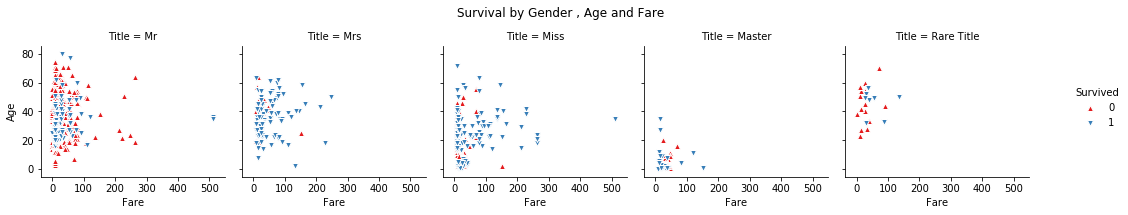

In [47]:
g = sns.FacetGrid(train, hue="Survived", col="Title", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare')

In [48]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Deck,Family,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,G,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,G,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,C,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,G,0,Mr


In [49]:
# Create name Length

# Name Length
train['Name_Length'] = train['Name'].apply(len)
test['Name_Length'] = test['Name'].apply(len)

train.drop(['Name'],axis=1,inplace=True)
test.drop(['Name'],axis=1,inplace=True)

In [50]:
train["Name_Length"].max(), train["Name_Length"].min()

(82, 12)

In [51]:
# Create ticket numbers

train["TicketNumber"] = train["Ticket"].str.extract('(\d{2,})', expand=True)
train["TicketNumber"] = train["TicketNumber"].apply(pd.to_numeric)

test["TicketNumber"] = test["Ticket"].str.extract('(\d{2,})', expand=True)
test["TicketNumber"] = test["TicketNumber"].apply(pd.to_numeric)

train.TicketNumber.fillna(train["TicketNumber"].median(), inplace=True)
test.TicketNumber.fillna(test["TicketNumber"].median(), inplace=True)

train.drop(['Ticket','PassengerId'],axis=1,inplace=True)
test.drop(['Ticket','PassengerId'],axis=1,inplace=True)

In [52]:
train.corr()["TicketNumber"]

Survived       -0.096161
Pclass          0.284631
Age            -0.091695
Fare           -0.156104
Family         -0.037374
Name_Length    -0.050760
TicketNumber    1.000000
Name: TicketNumber, dtype: float64

In [53]:
first_class_tickets =  train.loc[(train["Pclass"] == 1), 'TicketNumber'].unique()
print("Number of unique 1st class tickets", len(first_class_tickets))

second_class_tickets =  train.loc[(train["Pclass"] == 2), 'TicketNumber'].unique()
print("Number of unique 2nd class tickets", len(second_class_tickets))

thrid_class_tickets =  train.loc[(train["Pclass"] == 2), 'TicketNumber'].unique()
print("Number of unique 3rd class tickets" , len(thrid_class_tickets))

Number of unique 1st class tickets 146
Number of unique 2nd class tickets 140
Number of unique 3rd class tickets 140


In [54]:
# Ticket number has a correlation with the class
# since there are many ticket numbers and it not a discrete value 
# we'll drop this column

train.drop(['TicketNumber'],axis=1,inplace=True)
test.drop(['TicketNumber'],axis=1,inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


[mid, long, short, extra_long]
Categories (4, object): [short < mid < long < extra_long]


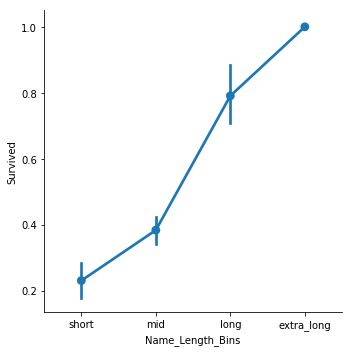

In [55]:
# Create bins using name Length

bins = [0, 20, 40, 57, 85]
group_names = ['short', 'mid', 'long', 'extra_long']
train['Name_Length_Bins'] = pd.cut(train['Name_Length'], bins, labels=group_names)
test['Name_Length_Bins'] = pd.cut(test['Name_Length'], bins, labels=group_names)

sns.factorplot(x="Name_Length_Bins", y="Survived", data=train)
print(train["Name_Length_Bins"].unique())

In [56]:
train.drop(['Name_Length'],axis=1,inplace=True)
test.drop(['Name_Length'],axis=1,inplace=True)

## # Data Scaling

In [57]:
from sklearn.preprocessing import scale

# Age and Fare in different scales
cols = ['Age','Fare']

for col in cols:
    train[cols] = scale(train[cols])
    test[cols] = scale(test[cols])

## Encoding categorical variables

In [58]:
# Convert Categorical Data into Numerical Values

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# convert the age bins into numerical value
labelEnc=LabelEncoder()

cat_vars=['Name_Length_Bins']
for col in cat_vars:
    train[col]=labelEnc.fit_transform(train[col])
    test[col]=labelEnc.fit_transform(test[col])

In [59]:
# Create Dummy variables
def preprocess_features(data):
    # convert categorical variables into numerical      
    
    output = pd.DataFrame(index = data.index)
   
    for col, col_data in data.iteritems():        
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)      
        output = output.join(col_data)
    
    return output

In [60]:
train = preprocess_features(train)
test = preprocess_features(test)

In [61]:
list(train)

['Survived',
 'Pclass',
 'Sex_female',
 'Sex_male',
 'Age',
 'Fare',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Deck_A',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Deck_T',
 'Family',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Rare Title',
 'Name_Length_Bins']

In [62]:
list(test)

['Pclass',
 'Sex_female',
 'Sex_male',
 'Age',
 'Fare',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Deck_A',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Family',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Rare Title',
 'Name_Length_Bins']

In [63]:
# There is no Deck_T in test data, so let's drop it
train.drop(['Deck_T'],axis=1,inplace=True)

In [64]:
train.head()

,Survived,Pclass,Sex_female,Sex_male,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Deck_A,...,Deck_E,Deck_F,Deck_G,Family,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare Title,Name_Length_Bins
0,0,3,0,1,-0.543643,-0.502445,0,0,1,0,...,0,0,1,1,0,0,1,0,0,2
1,1,1,1,0,0.543690,0.786845,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2,1,3,1,0,-0.271810,-0.488854,0,0,1,0,...,0,0,1,0,0,1,0,0,0,2
3,1,1,1,0,0.339815,0.420730,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
4,0,3,0,1,0.339815,-0.486337,0,0,1,0,...,0,0,1,0,0,0,1,0,0,2


In [65]:
test.head()

,Pclass,Sex_female,Sex_male,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,...,Deck_E,Deck_F,Deck_G,Family,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare Title,Name_Length_Bins
0,3,0,1,0.303728,-0.497079,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,3
1,3,1,0,1.183764,-0.511942,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,2
2,2,0,1,2.239807,-0.463770,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,2
3,3,0,1,-0.224294,-0.482143,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,3
4,3,1,0,-0.576308,-0.417167,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,1


# Modelisation

In [66]:
# Libraries

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, roc_curve, classification_report
from sklearn.naive_bayes import GaussianNB

In [67]:
# Split the data 

X = train.drop(['Survived'],1)
y = train['Survived']


# use the survival_ratio_in_train for the split
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=survival_ratio_in_train,
                                                    stratify = y
                                                   )

In [68]:
# Logistic regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


83.06

In [69]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex_female,1.415351
16,Title_Master,1.355328
12,Deck_E,1.272692
5,Embarked_C,0.642220
19,Title_Mrs,0.619864
6,Embarked_Q,0.588336
13,Deck_F,0.355134
9,Deck_B,0.317850
17,Title_Miss,0.261637
10,Deck_C,0.235491


In [70]:
# Support Vector Machines

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


81.42

In [71]:
# k-Nearest Neighbors 

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

86.7

In [72]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian

77.05

In [73]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

99.45

In [74]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

99.45

In [75]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,99.45
5,Decision Tree,99.45
1,KNN,86.70
2,Logistic Regression,83.06
0,Support Vector Machines,81.42
4,Naive Bayes,77.05
